In [1]:
import pandas as pd
pd.DataFrame({("a", "b"):{("A","B"):1, ("A", "C"):2},
             ("a", "a"):{("A","C"):3, ("A", "B"):4},
             ("a","c"):{("A","B"):5, ("A","C"):6},
             ("b", "a"):{("A", "C"):7, ("A", "B"):8},
             ("b", "b"):{("A", "D"):9, ("A", "B"):10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [2]:
from collections import namedtuple
Point3D = namedtuple("Point3D", "x y z")
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point3D(2, 3, None)])


,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


In [3]:
from dataclasses import make_dataclass
Point = make_dataclass("Point", [('x', int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])


,0
0,"Point(x=0, y=0)"
1,"Point(x=0, y=3)"
2,"Point(x=2, y=3)"


In [4]:
df = pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]), orient = "index", columns=["one", "two", "three"])
df

,one,two,three
A,1,2,3
B,4,5,6


In [5]:
del df["two"]
three = df.pop("three")
df

,one
A,1
B,4


In [6]:
df.insert(1, "bar", df["one"])
df

,one,bar
A,1,1
B,4,4


In [7]:
dfa = pd.DataFrame({"A":[1, 2, 3], "B":[4, 5, 6]})
dfs = dfa.assign(C=lambda x: x["A"] + x["B"], D = lambda x: x["A"] + x["C"])
dfs

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [8]:
dfs.iloc[0]

A    1
B    4
C    5
D    6
Name: 0, dtype: int64

In [9]:
dfs.loc[0]

A    1
B    4
C    5
D    6
Name: 0, dtype: int64

In [10]:
import numpy as np
df1 = pd.DataFrame({"A":[1.0, np.nan, 3.0, 5.0, np.nan], "B":[np.nan, 2.0, 3.0, np.nan, 6.0]})
df2 = pd.DataFrame({"A":[5.0, 2.0, 4.0, np.nan, 3.0, 7.0], "B":[np.nan, np.nan, 3.0, 4.0, 6.0, 8.0]})
df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [11]:
df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,8.0


In [12]:
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


In [13]:
arr = np.random.randn(20)
factor = pd.cut(arr, 4)
factor

[(-1.485, -0.726], (-0.726, 0.0323], (0.0323, 0.791], (-0.726, 0.0323], (-1.485, -0.726], ..., (0.0323, 0.791], (0.0323, 0.791], (0.0323, 0.791], (0.0323, 0.791], (-0.726, 0.0323]]
Length: 20
Categories (4, interval[float64]): [(-2.246, -1.485] < (-1.485, -0.726] < (-0.726, 0.0323] < (0.0323, 0.791]]

In [14]:
factor = pd.cut(arr, [-5, -1, 0, 1, 5])
factor

[(-5, -1], (-1, 0], (0, 1], (-1, 0], (-5, -1], ..., (0, 1], (0, 1], (0, 1], (0, 1], (-1, 0]]
Length: 20
Categories (4, interval[int64]): [(-5, -1] < (-1, 0] < (0, 1] < (1, 5]]

In [15]:
tsdf = pd.DataFrame(np.random.randn(10, 3), columns=["A", "B", "C"], index=pd.date_range("1/1/2000", periods=10))
from functools import partial
q_25 = partial(pd.Series.quantile, q=0.25)
q_25.__name__="25%"
q_75 = partial(pd.Series.quantile, q=0.75)
q_75.__name__ = "75%"
tsdf.agg(["count", "mean", "std", "min", q_25, "median", q_75, "max"])

,A,B,C
count,10.000000,10.000000,10.000000
mean,-0.036909,-0.066199,0.237215
std,0.999976,1.168154,0.926063
min,-1.490995,-1.977322,-1.104429
25%,-0.965833,-0.762003,-0.227772
median,0.056877,-0.064364,0.310673
75%,0.770345,0.232814,0.895487
max,1.293875,2.079725,1.636005


In [16]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s1 = s[:4]
s2 = s[1:]
s1.align(s2)

(a    0.231716
 b   -0.616697
 c    0.738554
 d   -0.817917
 e         NaN
 dtype: float64,
 a         NaN
 b   -0.616697
 c    0.738554
 d   -0.817917
 e    0.415453
 dtype: float64)

In [17]:
s1.align(s2, join="right")

(b   -0.616697
 c    0.738554
 d   -0.817917
 e         NaN
 dtype: float64,
 b   -0.616697
 c    0.738554
 d   -0.817917
 e    0.415453
 dtype: float64)

In [18]:
s1.align(s2, join="left")

(a    0.231716
 b   -0.616697
 c    0.738554
 d   -0.817917
 dtype: float64,
 a         NaN
 b   -0.616697
 c    0.738554
 d   -0.817917
 dtype: float64)

In [19]:
s1.align(s2, join="inner")

(b   -0.616697
 c    0.738554
 d   -0.817917
 dtype: float64,
 b   -0.616697
 c    0.738554
 d   -0.817917
 dtype: float64)

In [20]:
rng = pd.date_range("1/3/2000", periods=8)
ts = pd.Series(np.random.randn(8), index=rng)
ts2 = ts[[0, 3, 6]]
ts

2000-01-03    0.022410
2000-01-04   -0.296606
2000-01-05   -0.588954
2000-01-06    0.022996
2000-01-07   -0.017044
2000-01-08   -0.181347
2000-01-09    0.503191
2000-01-10    0.250065
Freq: D, dtype: float64

In [21]:
ts2.reindex(ts.index, method="ffill")#only ffill works if the index is strictly increasing or decreaing in order

2000-01-03    0.022410
2000-01-04    0.022410
2000-01-05    0.022410
2000-01-06    0.022996
2000-01-07    0.022996
2000-01-08    0.022996
2000-01-09    0.503191
2000-01-10    0.503191
Freq: D, dtype: float64

In [22]:
df = pd.DataFrame({"a":[1, 2, 3], "b":["a", "b", "c"]})
for row_index, row in df.iterrows():
    print(row_index, row, sep="\n")

0
a    1
b    a
Name: 0, dtype: object
1
a    2
b    b
Name: 1, dtype: object
2
a    3
b    c
Name: 2, dtype: object


In [23]:
df_orig = pd.DataFrame([[1, 1.5]], columns=["int", "float"])
df_orig.dtypes

int        int64
float    float64
dtype: object

In [24]:
row = next(df_orig.iterrows())[1]
row

int      1.0
float    1.5
Name: 0, dtype: float64

In [25]:
s = pd.Series(pd.date_range("20130101 09:10:12", periods=4))
s

0   2013-01-01 09:10:12
1   2013-01-02 09:10:12
2   2013-01-03 09:10:12
3   2013-01-04 09:10:12
dtype: datetime64[ns]

In [26]:
s.dt.hour

0    9
1    9
2    9
3    9
dtype: int64

In [27]:
s.dt.day

0    1
1    2
2    3
3    4
dtype: int64

In [28]:
stz = s.dt.tz_localize("US/Eastern")
stz

0   2013-01-01 09:10:12-05:00
1   2013-01-02 09:10:12-05:00
2   2013-01-03 09:10:12-05:00
3   2013-01-04 09:10:12-05:00
dtype: datetime64[ns, US/Eastern]

In [29]:
s = pd.Series(pd.date_range("20130101", periods=4))
s

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
dtype: datetime64[ns]

In [30]:
s.dt.strftime("%Y/%m/%d")

0    2013/01/01
1    2013/01/02
2    2013/01/03
3    2013/01/04
dtype: object

In [31]:
s = pd.Series(pd.timedelta_range("1 day 00:00:05", periods=4, freq="s"))
s

0   1 days 00:00:05
1   1 days 00:00:06
2   1 days 00:00:07
3   1 days 00:00:08
dtype: timedelta64[ns]

In [32]:
s.dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,1,0,0,5,0,0,0
1,1,0,0,6,0,0,0
2,1,0,0,7,0,0,0
3,1,0,0,8,0,0,0


In [33]:
s1 = pd.DataFrame({"a":["B", "a", "C"], "b":[1, 2, 3], "c":[2, 3, 4]}). set_index(list("ab"))
s1

,,c
a,b,
B,1,2
a,2,3
C,3,4


In [34]:
import datetime
df = pd.DataFrame([
    [1, 2], 
    ["a", "b"],
    [datetime.datetime(2016, 3, 2), datetime.datetime(2016, 3, 2)]
])
df = df.T
df

,0,1,2
0,1,a,2016-03-02
1,2,b,2016-03-02


In [35]:
df.dtypes

0            object
1            object
2    datetime64[ns]
dtype: object

In [36]:
df.infer_objects().dtypes

0             int64
1            object
2    datetime64[ns]
dtype: object

In [37]:
m = ["apple", datetime.datetime(2016, 3, 2)]
pd.to_datetime(m, errors="coerce")

DatetimeIndex(['NaT', '2016-03-02'], dtype='datetime64[ns]', freq=None)

In [38]:
m = ["apple", 2, 3]
pd.to_numeric(m, errors="ignore")

array(['apple', 2, 3], dtype=object)

In [39]:
df = pd.DataFrame({"string":list("abc"),
                  "int64":list(range(1, 4)),
                  "unit8":np.arange(3, 6).astype("u1"),
                  "float64":np.arange(4.0, 7.0),
                  "bool1":[True, False, True], 
                  "bool2":[False, True, False],
                  "dates":pd.date_range("now", periods=3),
                  "category":pd.Series(list("ABC")).astype("category")})
df["tdeltas"] = df.dates.diff()
df["uint64"] = np.arange(3, 6).astype("u8")
df["other_dates"] = pd.date_range("20130101", periods=3)
df["tz_aware_dates"] = pd.date_range("20130101", periods=3, tz="US/Eastern")
df

,string,int64,unit8,float64,bool1,bool2,dates,category,tdeltas,uint64,other_dates,tz_aware_dates
0,a,1,3,4.0,True,False,2021-08-10 21:15:16.291695,A,NaT,3,2013-01-01,2013-01-01 00:00:00-05:00
1,b,2,4,5.0,False,True,2021-08-11 21:15:16.291695,B,1 days,4,2013-01-02,2013-01-02 00:00:00-05:00
2,c,3,5,6.0,True,False,2021-08-12 21:15:16.291695,C,1 days,5,2013-01-03,2013-01-03 00:00:00-05:00


In [40]:
df.dtypes

string                                object
int64                                  int64
unit8                                  uint8
float64                              float64
bool1                                   bool
bool2                                   bool
dates                         datetime64[ns]
category                            category
tdeltas                      timedelta64[ns]
uint64                                uint64
other_dates                   datetime64[ns]
tz_aware_dates    datetime64[ns, US/Eastern]
dtype: object

In [41]:
df.select_dtypes(include=["number", "bool"], exclude=["unsignedinteger"])

,int64,float64,bool1,bool2,tdeltas
0,1,4.0,True,False,NaT
1,2,5.0,False,True,1 days
2,3,6.0,True,False,1 days


In [42]:
def subdtypes(dtype):
    subs = dtype.__subclasses__()
    if not subs:
        return dtype
    return [dtype, [subdtypes(dt) for dt in subs]]

In [43]:
subdtypes(np.generic)

[numpy.generic,
 [[numpy.number,
   [[numpy.integer,
     [[numpy.signedinteger,
       [numpy.int8,
        numpy.int16,
        numpy.intc,
        numpy.int32,
        numpy.int64,
        numpy.timedelta64]],
      [numpy.unsignedinteger,
       [numpy.uint8, numpy.uint16, numpy.uintc, numpy.uint32, numpy.uint64]]]],
    [numpy.inexact,
     [[numpy.floating,
       [numpy.float16, numpy.float32, numpy.float64, numpy.longdouble]],
      [numpy.complexfloating,
       [numpy.complex64, numpy.complex128, numpy.clongdouble]]]]]],
  [numpy.flexible,
   [[numpy.character, [numpy.bytes_, numpy.str_]],
    [numpy.void, [numpy.record]]]],
  numpy.bool_,
  numpy.datetime64,
  numpy.object_]]

In [44]:
from io import StringIO
data = "a, b, c, d\n5, 6, 7, 8\n9, 10, 11"
df = pd.read_csv(StringIO(data), dtype=object)
df

,a,b,c,d
0,5,6,7,8
1,9,10,11,NaN


In [45]:
col_1 = list(range(500000)) + ["a", "b"] + list(range(500000))
df = pd.DataFrame(col_1)
df

,0
0,0
1,1
2,2
3,3
4,4
...,...
999997,499995
999998,499996
999999,499997
1000000,499998


In [46]:
data = ("# empty\n"
       "# second empty line\n"
       "# third empty line\n"
       "X, Y, Z\n"
       "1, 2, 3\n"
       "A, B, C\n"
       "1, 2, 4.\n"
       "5., NaN, 10.0\n")
pd.read_csv(StringIO(data), comment = "#", skiprows=4, header=1)

,A,B,C
0,1.0,2,4.0
1,5.0,NaN,10.0


In [47]:
data = "a, b, c ~ 1, 2, 3~ 4, 5, 6"
pd.read_csv(StringIO(data), lineterminator="~")

,a,b,c
0,1,2,3
1,4,5,6


In [48]:
from pandas._testing import makeCustomDataframe as mkdf
df = mkdf(5, 3, r_idx_nlevels=2, c_idx_nlevels = 4)
df.to_csv("mi.csv", index=False)

In [49]:
pd.read_csv("mi.csv", header=[0, 1, 2, 3, 4], index_col=[0])

C_l0_g0,C_l0_g1,C_l0_g2
C_l1_g0,C_l1_g1,C_l1_g2
C_l2_g0,C_l2_g1,C_l2_g2
C_l3_g0,C_l3_g1,C_l3_g2
R0C0,R0C1,R0C2
R1C0,R1C1,R1C2
R2C0,R2C1,R2C2
R3C0,R3C1,R3C2
R4C0,R4C1,R4C2


In [50]:
dfd = pd.DataFrame(np.random.randn(5, 2), columns=list("AB"))
dfd["date"] = pd.Timestamp("20130101")
dfd = dfd.to_json(date_format="iso")
dfd

'{"A":{"0":2.0597240743,"1":-0.3266459201,"2":1.8185681638,"3":-0.7558570694,"4":0.170818113},"B":{"0":1.170594927,"1":-0.3488199052,"2":-0.2182264859,"3":0.4377944619,"4":-0.4564809329},"date":{"0":"2013-01-01T00:00:00.000Z","1":"2013-01-01T00:00:00.000Z","2":"2013-01-01T00:00:00.000Z","3":"2013-01-01T00:00:00.000Z","4":"2013-01-01T00:00:00.000Z"}}'

In [51]:
pd.read_json(dfd)

,A,B,date
0,2.059724,1.170595,2013-01-01 00:00:00+00:00
1,-0.326646,-0.348820,2013-01-01 00:00:00+00:00
2,1.818568,-0.218226,2013-01-01 00:00:00+00:00
3,-0.755857,0.437794,2013-01-01 00:00:00+00:00
4,0.170818,-0.456481,2013-01-01 00:00:00+00:00


In [52]:
data = [
    {
        "state":"Florida",
        "shortname":"FL",
        "info":{"governer":"Rick Scott"},
        "country":[
            {"name":"Dade", "population":1234},
            {"name":"Broward", "population":40000},
            {"name": "Palm Beach", "population":60000},
        ],
    },
    {
        "state":"Ohio",
        "shortname":"FL",
        "info":{"governer":"Rick Scott"},
        "country":[
            {"name":"Dade", "population":1234},
            {"name":"Cuyahoga", "population":1337}
        ]
    }
]
pd.json_normalize(data, "country", ["state", "shortname", ["info", "governer"]])

,name,population,state,shortname,info.governer
0,Dade,1234,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Dade,1234,Ohio,FL,Rick Scott
4,Cuyahoga,1337,Ohio,FL,Rick Scott


In [53]:
from pandas.io.json import build_table_schema
s_dupe = pd.Series([1, 2], index=[1, 1])
build_table_schema(s_dupe)

{'fields': [{'name': 'index', 'type': 'integer'},
  {'name': 'values', 'type': 'integer'}],
 'pandas_version': '0.20.0'}

In [54]:
url = "http://infotech.scu.edu.au/~jsaini12/resume.html"
dfs = pd.read_html(url)
dfs

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [57]:
url_df = pd.DataFrame({"name":["Pandas", "python"],
                      "url":["https://www.python.org/", "http://pandas.pydata.org"]})
print(url_df.to_html(render_links=True))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>name</th>
      <th>url</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Pandas</td>
      <td><a href="https://www.python.org/" target="_blank">https://www.python.org/</a></td>
    </tr>
    <tr>
      <th>1</th>
      <td>python</td>
      <td><a href="http://pandas.pydata.org" target="_blank">http://pandas.pydata.org</a></td>
    </tr>
  </tbody>
</table>


In [58]:
df_1 = pd.DataFrame(np.random.randn(10, 2), columns=list("AB"))
df_2 = pd.DataFrame(np.random.randn(10, 2), columns=list("AB"))
st = pd.HDFStore("appned.h5", mode="w")
st.append("df", df_1, data_columns=["B"], index=False)
st.append("df", df_2, data_columns=["B"], index=False)
st.get_storer("df").table

/df/table (Table(20,)) ''
  description := {
  "index": Int64Col(shape=(), dflt=0, pos=0),
  "values_block_0": Float64Col(shape=(1,), dflt=0.0, pos=1),
  "B": Float64Col(shape=(), dflt=0.0, pos=2)}
  byteorder := 'little'
  chunkshape := (2730,)

In [59]:
mask = pd.array([True, False, True, False, pd.NA, False], dtype="boolean")
mask

<BooleanArray>
[True, False, True, False, <NA>, False]
Length: 6, dtype: boolean

In [60]:
s = pd.Series([0, 1, 2, 3, 4, 5])
example_weights = [0, 0, 0.2, 0.2, 0.2, 0.4]
s.sample(n=3, weights=example_weights)

2    2
3    3
5    5
dtype: int64

In [61]:
df = pd.DataFrame({'vals':[1, 2, 3, 4], "ids":["a", "b", "f", 'c'], "ids2":['a', 'n', 'c', 'n']})
values = ['a', 'b', 1, 3]
df.isin(values)

,vals,ids,ids2
0,True,True,True
1,False,True,False
2,True,False,False
3,False,False,False


In [62]:
df3 = pd.DataFrame({'A':[1, 2, 3],
                   'B':[4, 5, 6],
                   'C':[7, 8, 9]})
df3.where(lambda x: x > 4, lambda x: x + 10)

,A,B,C
0,11,14,7
1,12,5,8
2,13,6,9


In [63]:
df = pd.DataFrame({'col1':list('ABBC'), 'col2':list('ZZXY')})
conditions = [
    (df['col2'] == 'Z') & (df['col1'] == 'A'),
    (df['col2'] == 'Z') & (df['col1'] == 'B'),
    (df['col1'] == 'B')
]
choices = ['yellow', 'blue', 'purple']
df['color'] = np.select(conditions, choices, default='black')
df

,col1,col2,color
0,A,Z,yellow
1,B,Z,blue
2,B,X,purple
3,C,Y,black


In [64]:
df = pd.DataFrame(np.random.randint(9, size=(9, 2)), columns=list('bc'))
df.index.name = 'a'
df

,b,c
a,,
0,4,7
1,7,6
2,6,0
3,4,4
4,3,3
5,0,3
6,6,6
7,7,8
8,3,8


In [66]:
df.query('a < b and b < c')

,b,c
a,,
0,4,7


In [65]:
n = 10
colors = np.random.choice(['red', 'green'], size=n)
foods = np.random.choice(['eggs', 'ham'], size = n)
colors

array(['red', 'red', 'green', 'green', 'green', 'red', 'red', 'red',
       'green', 'green'], dtype='<U5')

In [68]:
foods

array(['ham', 'eggs', 'ham', 'ham', 'ham', 'ham', 'eggs', 'eggs', 'ham',
       'ham'], dtype='<U4')

In [67]:
index = pd.MultiIndex.from_arrays([colors, foods], names=["Colors", "Foods"])
df = pd.DataFrame(np.random.randn(n, 2), index=index)
df

0         1
Colors Foods                    
red    ham    0.120915 -1.414242
       eggs   0.137011  0.978941
green  ham    1.013325  0.699532
       ham    0.402065 -0.727332
       ham    0.764276 -0.161914
red    ham   -0.870309 -0.380089
       eggs  -0.117232 -0.401596
       eggs   0.565923 -1.569236
green  ham    0.440651 -0.251843
       ham   -0.365183  0.680366

In [ ]:
df.query('Colors == "red"')

In [ ]:
df.index.names = [None, None]

In [ ]:
df.query('ilevel_0 == "red"')

In [ ]:
df2 = pd.DataFrame({'a':['one', 'one', 'two', 'two','two', 'three', 'four'],
                   'b':['x', 'y', 'x', 'y', 'x', 'x', 'x'],
                   'c': np.random.randn(7)})
df2

In [ ]:
df2.duplicated('a')

In [ ]:
df2.duplicated('a', keep='last')

In [ ]:
df2.duplicated('a', keep=False)

In [ ]:
df2.drop_duplicates('a')

In [ ]:
df = pd.DataFrame({'col':['A', 'A', 'B', 'B'],
                  'A':[80, 23, np.nan, 22],
                  'B':[80, 55, 76, 67]})
df

In [ ]:
idx, cols = pd.factorize(df['col'])
df1 = df.reindex(cols, axis=1).to_numpy()[np.arange(len(df)), idx]
idx, cols

In [ ]:
df1

In [ ]:
len(df1)

In [ ]:
arrays = [
    ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']
]
tuples = list(zip(*arrays))
tuples

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

In [ ]:
s = pd.Series(np.random.randn(8), index=index)
s

In [ ]:
df = pd.DataFrame([['bar', 'one'], ['bar', 'two'], ['foo', 'one'], ['foo', 'two']], columns = ["first", "second"])
pd.MultiIndex.from_frame(df)

In [ ]:
midx = pd.MultiIndex(levels = [["zero", "one"], ["x", "y"]], codes = [[1, 1, 0, 0], [1, 0, 1, 0]])
df = pd.DataFrame(np.random.randn(4, 2), index=midx)
df

In [ ]:
df2 = df.groupby(level=0).mean()
df2

In [ ]:
df_aligned, df2_aligned = df.align(df2, level = 0)
df_aligned

In [ ]:
df2_aligned

In [69]:
index = pd.Index(np.random.randint(0, 1000, 10))
index

Int64Index([791, 453, 709, 344, 661, 175, 412, 25, 710, 203], dtype='int64')

In [71]:
positions = [0, 9, 3]
index[positions]

Int64Index([791, 203, 344], dtype='int64')

In [72]:
index.take(positions)

Int64Index([791, 203, 344], dtype='int64')

In [73]:
ser = pd.Series(np.random.randn(10))
ser.iloc[positions]

0    0.523701
9   -0.651640
3    0.079742
dtype: float64

In [74]:
ser.take(positions)

0    0.523701
9   -0.651640
3    0.079742
dtype: float64

In [76]:
from pandas.api.types import CategoricalDtype
df = pd.DataFrame({"A":np.arange(6), "B":list("aabbca")})
df["B"] = df["B"].astype(CategoricalDtype(list("cab")))
df

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,c
5,5,a


In [80]:
df2 = df.set_index("B")
df2.index

CategoricalIndex(['a', 'a', 'b', 'b', 'c', 'a'], categories=['c', 'a', 'b'], ordered=False, name='B', dtype='category')

In [81]:
df2

,A
B,
a,0
a,1
b,2
b,3
c,4
a,5


In [82]:
df2.sort_index()

,A
B,
c,4
a,0
a,1
a,5
b,2
b,3


In [83]:
df2.groupby(level=0).sum()

,A
B,
c,4
a,6
b,5


In [84]:
df2.groupby(level=0).sum().index

CategoricalIndex(['c', 'a', 'b'], categories=['c', 'a', 'b'], ordered=False, name='B', dtype='category')

In [85]:
df = pd.DataFrame({"A":[1, 2, 3, 4]}, index=pd.IntervalIndex.from_breaks([0, 1, 2, 3, 4]))
df

,A
"(0, 1]",1
"(1, 2]",2
"(2, 3]",3
"(3, 4]",4


In [86]:
df.loc[2]

A    2
Name: (1, 2], dtype: int64

In [87]:
df.loc[[2, 3]]

,A
"(1, 2]",2
"(2, 3]",3


In [88]:
df.loc[2.5]

A    3
Name: (2, 3], dtype: int64

In [89]:
df.loc[[2.5, 3.5]]

,A
"(2, 3]",3
"(3, 4]",4


In [91]:
df.loc[pd.Interval(1, 2)]

A    2
Name: (1, 2], dtype: int64

In [92]:
pd.interval_range(start=pd.Timestamp("2017-01-01"), periods=4, freq="W")

IntervalIndex([(2017-01-01, 2017-01-08], (2017-01-08, 2017-01-15], (2017-01-15, 2017-01-22], (2017-01-22, 2017-01-29]],
              closed='right',
              dtype='interval[datetime64[ns]]')

In [93]:
s3 = pd.Series([0, 1, 2, 3], name = "Foo")
s4 = pd.Series([0, 1, 2, 3])
s5 = pd.Series([0, 1, 4, 6])
pd.concat([s3, s4, s5], axis = 1, keys=["red", "blue", "yellow"])

,red,blue,yellow
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,6


In [95]:
left = pd.DataFrame({
    "key1" : ["K0", "K0", "K1", "K2"],
    "key2" : ["K0", "K1", "K0", "K1"],
    "A" : ["A0", "A1", "A2", "A3"],
    "B" : ["B0", "B1", "B2", "B3"]
})
right = pd.DataFrame({
    "key1":["K0", "K1", "K1", "K2"],
    "key2":["K0", "K0", "K0", "K0"],
    "C":["C0", "C1", "C2", "C3"],
    "D":["D0", "D1", "D2", "D3"]
})
result = pd.merge(left, right, how="left", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [96]:
result1 = pd.merge(left, right, how="right", on=["key1", "key2"])
result1

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [98]:
df1 = pd.DataFrame({"col1":[0, 1], "col_left":["a", "b"]})
df2 = pd.DataFrame({"col1":[1, 2, 2], "col_right":[2, 2, 2]})
pd.merge(df1, df2, on="col1", how="outer", indicator=True)

,col1,col_left,col_right,_merge
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [100]:
left = pd.DataFrame({"A": ["A0", "A1", "A2"], "B":["B0", "B1", "B2"]}, index=["K0", "K1", "K2"])
right = pd.DataFrame({"C":["C0", "C2", "C3"], "D":["D0", "D2", "D3"]}, index=["K0", "K2", "K3"])
result = left.join(right)
result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [2]:
import pandas as pd
import numpy as np

In [3]:
left = pd.DataFrame({"k":["k0", "k1", "k2"], "v":[1, 2, 3]})
right = pd.DataFrame({"k":["k0", "k0", "k3"], "v":[4, 5, 6]})
result = pd.merge(left, right, on="k")
result

,k,v_x,v_y
0,k0,1,4
1,k0,1,5


In [4]:
left = left.set_index("k")
right = right.set_index("k")
result = left.join(right, lsuffix = "_l", rsuffix="_r")
result

,v_l,v_r
k,,
k0,1,4.0
k0,1,5.0
k1,2,NaN
k2,3,NaN


In [6]:
right2 = pd.DataFrame({"v":[7, 8, 9]}, index=["k1", "k1", "k2"])
result = left.join([right, right2])
result

,v_x,v_y,v
k0,1,4.0,NaN
k0,1,5.0,NaN
k1,2,NaN,7.0
k1,2,NaN,8.0
k2,3,NaN,9.0


In [8]:
df1 = pd.DataFrame([[np.nan, 3, 5], [-4.6, np.nan, np.nan], [np.nan, 7, np.nan]])
df2 = pd.DataFrame([[-42.6, np.nan, -8.2], [-5, 1.6, 4]], index=[1, 2])
result = df1.combine_first(df2)
result

,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,-8.2
2,-5.0,7.0,4.0


In [13]:
result1 = df1.update(df2)
df1

,0,1,2
0,NaN,3.0,5.0
1,-42.6,NaN,-8.2
2,-5.0,1.6,4.0


In [15]:
left = pd.DataFrame({"k":["k0", "k1", "k1", "k2"], "lv":[1, 2, 3, 4], "s":["a", "b", "c", "d"]})
right = pd.DataFrame({"k":["k1", "k2", "k4"], "rv":[1, 2, 3]})
pd.merge_ordered(left, right, fill_method="ffill", left_by = "s")

,k,lv,s,rv
0,k0,1.0,a,NaN
1,k1,1.0,a,1.0
2,k2,1.0,a,2.0
3,k4,1.0,a,3.0
4,k1,2.0,b,1.0
5,k2,2.0,b,2.0
6,k4,2.0,b,3.0
7,k1,3.0,c,1.0
8,k2,3.0,c,2.0
9,k4,3.0,c,3.0


In [17]:
df = pd.DataFrame({
    "col1":["a", "a", "b", "b", "a"],
    "col2":[1, 2, 3, np.nan, 5],
    "col3":[1, 2, 3, 4, 5]
}, columns = ["col1", "col2", "col3"])
df


,col1,col2,col3
0,a,1.0,1
1,a,2.0,2
2,b,3.0,3
3,b,NaN,4
4,a,5.0,5


In [19]:
df2 = df.copy()
df2.loc[0, "col1"] = "c"
df2.loc[2, "col3"] = 4
df2

,col1,col2,col3
0,c,1.0,1
1,a,2.0,2
2,b,3.0,4
3,b,NaN,4
4,a,5.0,5


In [21]:
cheese = pd.DataFrame({
    "first":["john", "mary"],
    "last":["doe", "bo"],
    "height":[5.5, 6],
    "weight":[130, 150]
})
cheese.melt(id_vars=["first", "last"])

,first,last,variable,value
0,john,doe,height,5.5
1,mary,bo,height,6.0
2,john,doe,weight,130.0
3,mary,bo,weight,150.0


In [22]:
cheese.melt(id_vars = ["first", "last"], var_name = "quantity")

,first,last,quantity,value
0,john,doe,height,5.5
1,mary,bo,height,6.0
2,john,doe,weight,130.0
3,mary,bo,weight,150.0


In [28]:
dft = pd.DataFrame({
    "A1970":{0:"a", 1:"b", 2:"c"},
    "A1980":{0:"d", 1:"e", 2:"f"},
    "B1970":{0:2.5, 1:1.3, 2:0.7},
    "B1980":{0:3.2, 1:1.3, 2:0.1},
    "X":dict(zip(range(3), np.random.randn(3)))
})
dft["id"] = dft.index
dft

,A1970,A1980,B1970,B1980,X,id
0,a,d,2.5,3.2,0.004820,0
1,b,e,1.3,1.3,-0.680446,1
2,c,f,0.7,0.1,0.725510,2


In [29]:
pd.wide_to_long(dft, ["A", "B"], i = "id", j="year")

,,X,A,B
id,year,,,
0,1970,0.004820,a,2.5
1,1970,-0.680446,b,1.3
2,1970,0.725510,c,0.7
0,1980,0.004820,d,3.2
1,1980,-0.680446,e,1.3
2,1980,0.725510,f,0.1


In [30]:
df = pd.DataFrame({"A":[1, 2, 2, 2, 2], "B":[3, 3, 4, 4, 4], "C":[1, 1, np.nan, 1, 1]})
df

,A,B,C
0,1,3,1.0
1,2,3,1.0
2,2,4,NaN
3,2,4,1.0
4,2,4,1.0


In [31]:
pd.crosstab(df["A"], df["B"])

B,3,4
A,,
1,1,0
2,1,3


In [32]:
df = pd.DataFrame({"A":["a", "b", "a"], "B":["c", "c", "c"], "C":[1, 2, 3]})
pd.get_dummies(df)

,C,A_a,A_b,B_c
0,1,1,0,1
1,2,0,1,1
2,3,1,0,1


In [34]:
pd.get_dummies(df, columns=["A"])

,B,C,A_a,A_b
0,c,1,1,0
1,c,2,0,1
2,c,3,1,0


In [36]:
x = pd.Series(["A", "A", np.nan, "B", 3.14, np.inf])
pd.factorize(x)

(array([ 0,  0, -1,  1,  2,  3], dtype=int32),
 Index(['A', 'B', 3.14, inf], dtype='object'))

In [42]:
pd.factorize(x)

(array([ 0,  0, -1,  1,  2,  3], dtype=int32),
 Index(['A', 'B', 3.14, inf], dtype='object'))

In [46]:
np.random.seed([3, 1415])
n = 20
cols = np.array(["key", "row", "item", "col"])
df = cols + pd.DataFrame((np.random.randint(5, size=(n, 4)) // [2, 1, 2, 1]).astype(str))
df.columns = cols
df = df.join(pd.DataFrame(np.random.rand(n, 2)).add_prefix("val"))
df

,key,row,item,col,val0,val1
0,key0,row3,item1,col3,0.805688,0.038985
1,key1,row2,item1,col2,0.438329,0.067359
2,key1,row0,item1,col0,0.774688,0.009526
3,key0,row4,item0,col2,0.149733,0.585309
4,key1,row0,item2,col1,0.811828,0.639003
5,key1,row2,item2,col4,0.132974,0.883372
6,key2,row4,item1,col3,0.882258,0.391942
7,key1,row4,item1,col1,0.099619,0.071612
8,key1,row0,item2,col4,0.651631,0.015642
9,key1,row2,item0,col2,0.348386,0.606346


In [47]:
df = pd.DataFrame([{"var1":"a, b, c", "var2":1}, {"var1":"d, e, f", "var2":2}])
df

,var1,var2
0,"a, b, c",1
1,"d, e, f",2


In [51]:
df.assign(var1 = df.var1.str.split(",")).explode("var1")

,var1,var2
0,a,1
0,b,1
0,c,1
1,d,2
1,e,2
1,f,2


In [52]:
s = pd.Series(["a", "b", "c", "d"], dtype = "string")
s.str.cat(sep=",")

'a,b,c,d'

In [53]:
pd.Series(["a1", "b2", "c3"], dtype="string").str.extract(r"([ab])(\d)", expand=False)

,0,1
0,a,1
1,b,2
2,<NA>,<NA>


In [54]:
s = pd.Series(["a1a2", "b1", "c1"], index=["A", "B", "C"], dtype="string")
s

A    a1a2
B      b1
C      c1
dtype: string

In [56]:
two_groups = "(?P<letter>[a-z])(?P<digit>[0-9])"
s.str.extract(two_groups, expand=True)

,letter,digit
A,a,1
B,b,1
C,c,1


In [57]:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13, np.nan, np.nan])
ser

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [58]:
ser.interpolate()

0     NaN
1     NaN
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    13.0
8    13.0
dtype: float64

In [59]:
df = pd.DataFrame(np.random.randn(10, 2))
df[np.random.rand(df.shape[0]) > 0.5] = 1.5
df.replace(1.5, np.nan)

,0,1
0,1.485629,0.328995
1,NaN,NaN
2,NaN,NaN
3,-0.530721,1.176287
4,-0.305795,0.163245
5,-0.320613,-1.900125
6,0.095495,-0.990709
7,NaN,NaN
8,-1.757701,1.351598
9,NaN,NaN


In [60]:
df2 = pd.DataFrame({"A":[0, 1, 2]}, index=["a", "a", "b"])
df2.index.is_unique

False

In [61]:
df2.columns.is_unique

True

In [64]:
s = pd.Series(["one", "two", "four", "-"], dtype="category")
s

0     one
1     two
2    four
3       -
dtype: category
Categories (4, object): [-, four, one, two]

In [67]:
s = s.cat.set_categories(["one", "two", "three", "four"])
s

0     one
1     two
2    four
3     NaN
dtype: category
Categories (4, object): [one, two, three, four]

In [68]:
from pandas.api.types import union_categoricals
a = pd.Categorical(["b", "c"])
b = pd.Categorical(["a", "b"])
union_categoricals([a, b])

[b, c, a, b]
Categories (3, object): [b, c, a]

In [69]:
pd.Series([True, False, np.nan], dtype="object") & True

0     True
1    False
2    False
dtype: bool

In [70]:
pd.Series([True, False, np.nan], dtype="boolean") & True

0     True
1    False
2     <NA>
dtype: boolean

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

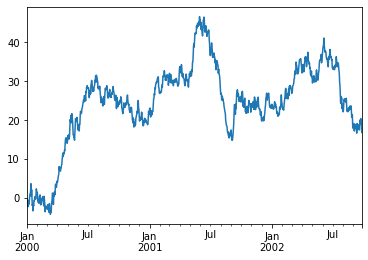

In [3]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

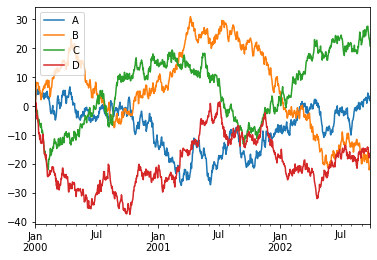

In [8]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
plt.figure()
df.plot()

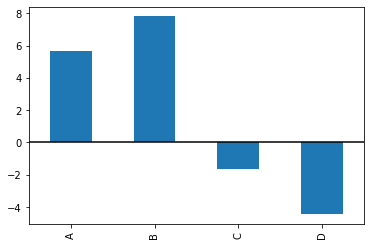

In [11]:
df.iloc[5].plot.bar()
plt.axhline(0, color="k")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x04EAA460>,
      dtype=object)

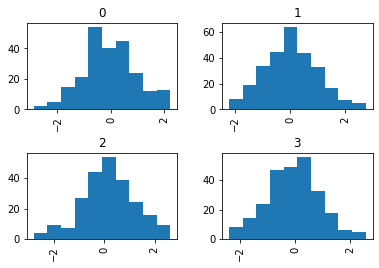

In [13]:
data = pd.Series(np.random.randn(1000))
data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

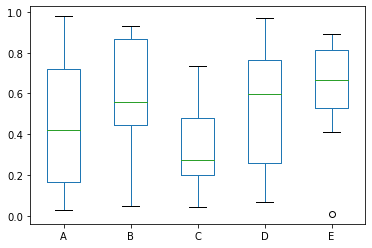

In [14]:
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])
df.plot.box()

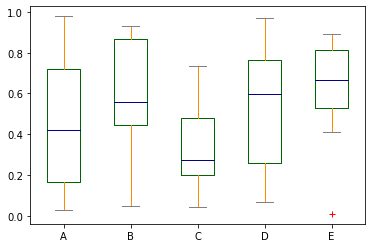

In [17]:
color = {
    "boxes":"DarkGreen",
    "whiskers":"DarkOrange",
    "medians":"DarkBlue",
    "caps":"Gray"
}
df.plot.box(color=color, sym="r+")

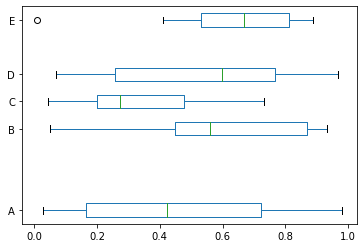

In [20]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8])

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12AB3460>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

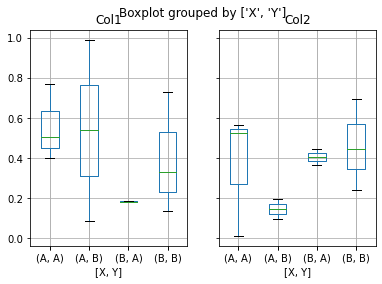

In [26]:
df = pd.DataFrame(np.random.rand(10, 3), columns=["Col1", "Col2", "Col3"])
df["X"] = pd.Series(["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"])
df["Y"] = pd.Series(["A", "B", "A", "B", "A", "B", "A", "B", "A", "B"])
plt.figure()
df.boxplot(column = ["Col1", "Col2"], by = ["X", "Y"])

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


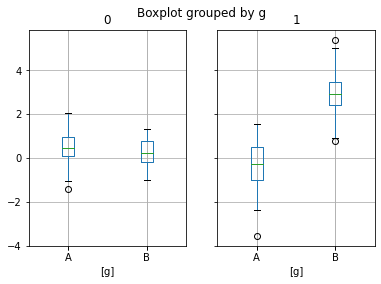

In [31]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box["g"] = np.random.choice(["A", "B"], size=50)
df_box.loc[df_box["g"] == "B", 1] += 3
dp = df_box.boxplot(by="g")

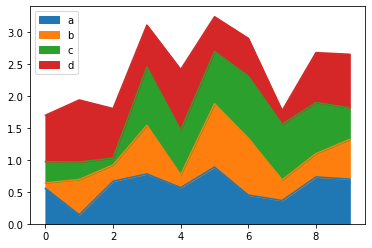

In [32]:
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df.plot.area()

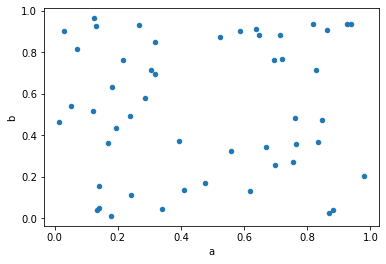

In [34]:
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])
df["species"] = pd.Categorical(["setosa"] * 20 + ["vericolor"] * 20 + ["virginica"] * 10)
df.plot.scatter(x="a", y="b")

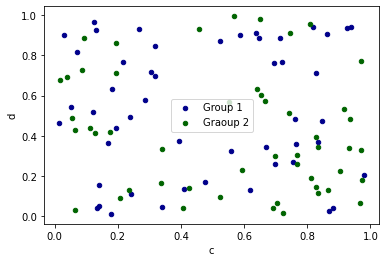

In [36]:
ax = df.plot.scatter(x="a", y="b", color = "DarkBlue", label="Group 1")
df.plot.scatter(x = "c", y = "d", color="DarkGreen", label="Graoup 2", ax=ax)

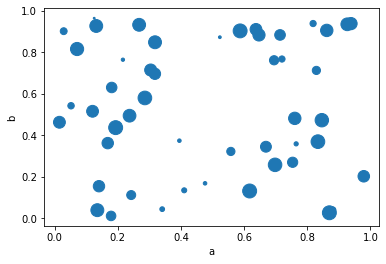

In [37]:
df.plot.scatter(x = "a", y = "b", s = df["c"] * 200)

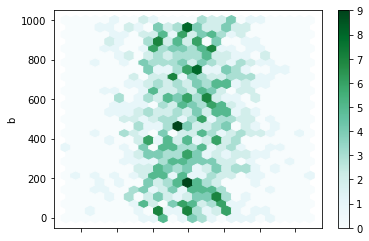

In [38]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])
df["b"] = df["b"] + np.arange(1000)
df.plot.hexbin(x = "a", y = "b", gridsize=25)

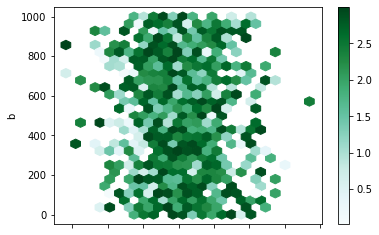

In [39]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])
df["b"] = df["b"] + np.arange(1000)
df["z"] = np.random.uniform(0, 3, 1000)
df.plot.hexbin(x = "a", y = "b", C="z", reduce_C_function = np.max, gridsize=25)

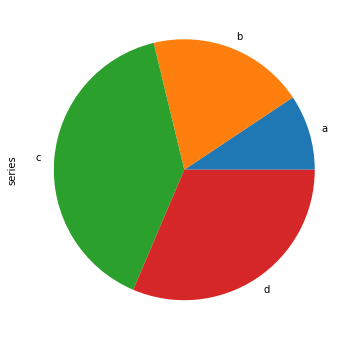

In [40]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")
series.plot.pie(figsize=(6, 6))

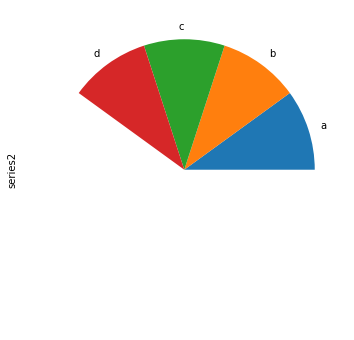

In [42]:
series = pd.Series([0.1] * 4, index = ["a", "b", "c", "d"], name = "series2")
series.plot.pie(figsize=(6, 6))

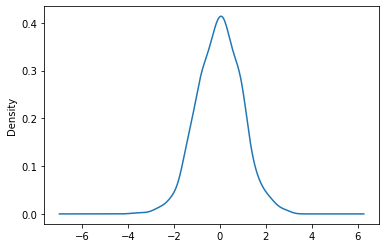

In [47]:
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()

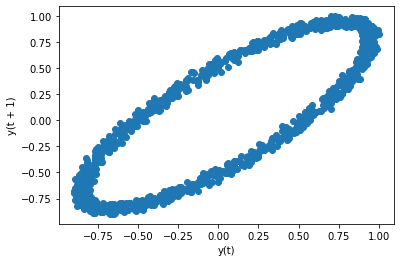

In [48]:
from pandas.plotting import lag_plot
plt.figure()
spacing = np.linspace(-99*np.pi, 99 * np.pi, num = 1000)
data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(spacing))
lag_plot(data)

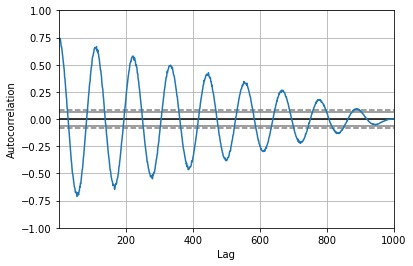

In [49]:
from pandas.plotting import autocorrelation_plot
plt.figure()
spacing = np.linspace(-9 * np.pi, 9 * np.pi, num = 1000)
data = pd.Series(0.7 * np.random.rand(1000) * 0.3 * np.sin(spacing))
autocorrelation_plot(data)

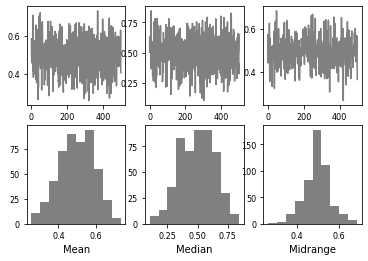

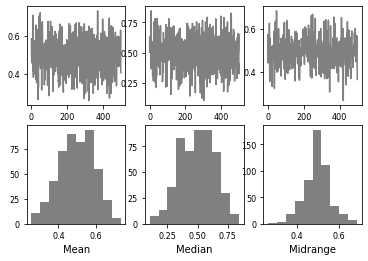

In [52]:
from pandas.plotting import bootstrap_plot
data = pd.Series(np.random.rand(1000))
bootstrap_plot(data, size=10, samples=500, color="grey")

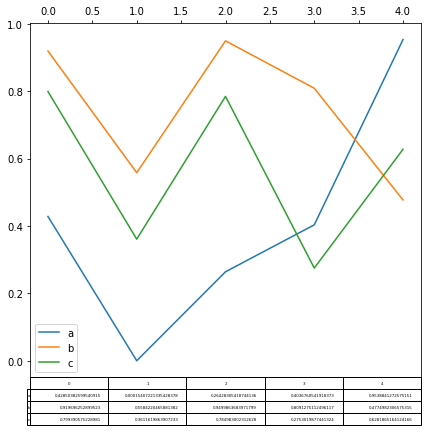

In [55]:
fig, ax = plt.subplots(1, 1, figsize = (7, 6.5))
df = pd.DataFrame(np.random.rand(5, 3), columns = ["a", "b", "c"])
ax.xaxis.tick_top()
df.plot(table=True, ax=ax)

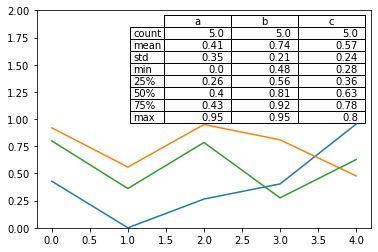

In [57]:
from pandas.plotting import table
fig, ax = plt.subplots(1, 1)
table(ax, np.round(df.describe(), 2), loc="upper right", colWidths=[0.2, 0.2, 0.2])
df.plot(ax = ax, ylim=(0, 2), legend=None)